# Part 1 : Semantic Search Engine with Sentence BERT

BERT from scratch, it is computationally very expensive. Typically you need to feed in pair of sentences to BERT for training
Sentence BERT (or SBERT) which is modification of BERT is much more suitable for generating sentence embeddings. It uses Siamese and triplet network structure to derive useful sentence embeddings that can be compared easily using cosine similarity. This reduces the effort for finding the most similar pair while maintaining the accuracy from BERT.

Paper Link : https://www.aclweb.org/anthology/D19-1410.pdf

Dataset : headlines from Australiam newspaper.
Link Dataset : https://www.kaggle.com/therohk/million-headlines

**Step 1 : Generate sentence embedding for all news headlines in the corpus**

In [ ]:
!pip install transformers

In [ ]:
!pip install scipy

In [ ]:
!pip install sentence-transformers

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import spacy
import string
import gensim
import operator
import re

In [ ]:
from sentence_transformers import SentenceTransformer
# Load the BERT model. Various models trained on Natural Language Inference (NLI) https://github.com/UKPLab/sentence-transformers/blob/master/docs/pretrained-models/nli-models.md and 


model = SentenceTransformer('bert-base-nli-mean-tokens')

# A corpus is a list with documents split by sentences.





In [ ]:

df=pd.read_csv("/content/abcnews-date-text.csv")



In [ ]:
df.shape

(1186018, 2)

In [ ]:
data=df.sample(10000)

In [ ]:
data.head()

,publish_date,headline_text
1040052,20160731,legal action over bid to use meander school fo...
359920,20080129,battleship enthusiasts go into combat for fun
586297,20110106,socceroos have work to do neill
877411,20140527,waroona atm explosion cash theft charges
1108401,20171129,multiculturalism report finds discrimination g...


In [ ]:
data.shape

(10000, 2)

In [ ]:
sentences = data['headline_text'].values.tolist()

#sentences = ['aba decides against community broadcasting licence', 
#             'act fire witnesses must be aware of defamation',
#             'a g calls for infrastructure protection summit',
#             'air nz staff in aust strike for pay rise',
#             'air nz strike to affect australian travellers',
#             'ambitious olsson wins triple jump',
#             'antic delighted with record breaking barca',
#             'aussie qualifier stosur wastes four memphis match',
#             'aust addresses un security council over iraq',
#             'australia is locked into war timetable opp',
#             'australia to contribute 10 million in aid to iraq']

# Each sentence is encoded as a 1-D vector with 78 columns
sentence_embeddings = model.encode(sentences)

print('Sample BERT embedding vector - length', len(sentence_embeddings[0]))

print('Sample BERT embedding vector - note includes negative values', sentence_embeddings[0])

Sample BERT embedding vector - length 768
Sample BERT embedding vector - note includes negative values [ 1.67729899e-01  7.26868093e-01  5.36100984e-01  1.80525497e-01
  7.44936645e-01  1.51040778e-01  1.41194269e-01 -6.62991107e-01
  5.19568086e-01  1.23438992e-01  4.44892645e-01  4.57529873e-01
  5.54972470e-01  8.01436603e-01 -6.12169087e-01  4.01144564e-01
 -3.48201334e-01 -1.92309897e-02  9.15854335e-01 -2.23132163e-01
 -2.72524774e-01 -5.59263229e-01  1.64022177e-01  3.92747819e-01
  7.83170342e-01  1.28101730e+00 -2.30204776e-01  1.40323892e-01
 -1.52600229e+00  3.57011646e-01 -9.84195098e-02  4.21513289e-01
 -1.40911371e-01 -9.23793912e-02  9.53829885e-02  1.01266778e+00
 -4.24387194e-02  3.00159544e-01 -1.65133789e-01 -2.88388878e-01
 -1.02733529e+00  3.81423533e-02 -4.01424617e-01 -1.59107298e-01
 -9.97681618e-01 -6.17446780e-01  4.78053570e-01  6.27062142e-01
 -1.37247875e-01 -6.65816426e-01  3.99185359e-01 -3.38077068e-01
  6.74543262e-01  4.02694225e-01 -1.77293329e-03 -5.

**Embeddings is done, we can start doing search.**

**Step 2 : Search query**

We takes as an input the search query, compute query embeddings and then computes distance between query embedding with each embeddings of each news element in the corpus

In [ ]:
#@title Sematic Search Form
import scipy
from scipy.spatial import distance
# code adapted from https://github.com/UKPLab/sentence-transformers/blob/master/examples/application_semantic_search.py

#query = 'bad weather' #@param {type: 'string'}
#query = 'employee stop working' #@param {type: 'string'}
#query = "moderate lift in economy"
query = 'global warming impact'
#query = 'wildfires in australia'

queries = [query]
query_embeddings = model.encode(queries)

# Find the closest 3 sentences of the corpus for each query sentence based on cosine similarity
number_top_matches =  8#@param {type: "number"}

print("Semantic Search Results")

for query, query_embedding in zip(queries, query_embeddings):
    distances = scipy.spatial.distance.cdist([query_embedding], sentence_embeddings, "cosine")[0]

    results = zip(range(len(distances)), distances)
    results = sorted(results, key=lambda x: x[1])
    print(type(results))

    print("\n\n======================\n\n")
    print("Query:", query)
    print("\nTop 5 most similar sentences in corpus:")

    for idx, distance in results[0:number_top_matches]:
        print(sentences[idx].strip(), "(Cosine Score: %.4f)" % (1-distance))

Semantic Search Results
<class 'list'>




Query: global warming impact

Top 5 most similar sentences in corpus:
coalition and labor policies on climate change (Cosine Score: 0.8049)
how climate change will change tourism (Cosine Score: 0.7924)
impact of labors climate policies to be quantified (Cosine Score: 0.7716)
lewandowsky climate change risk (Cosine Score: 0.7618)
forum to put focus on climate change challenge (Cosine Score: 0.7341)


**Conclusion : results are semantically related !**

# Part 2 : Build a custom pipeline


Steps :

1. Indexing—Ingesting and storing data efficiently so that it can be retrieved
quickly
2. Querying—Providing retrieval functionality so that search can be performed by
an end user
3. Ranking—Presenting and ranking the results according to certain metrics to
best satisfy users’ information needs




We will impelnt our search egnine using TF*IDF & LSI |
[LSI Paper ](http://www.iro.umontreal.ca/~nie/IFT6255/LSI.pdf) \
In a nutshell LSI adds an important step to the document indexing process. LSI examines a collection of documents to see which documents contain some of those same words. LSI considers documents that have many words in common to be semantically close, and ones with less words in common to be less close

In [ ]:
import spacy
import re

In [ ]:
# GET the Data
df_movies = pd.read_csv('/content/movies.csv')

In [ ]:
df_movies.head()

,rank,title,genre,wiki_plot,imdb_plot
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1..."


**Data Cleaning and Pre-processing**

In [ ]:
#Text Cleaning and tokenisation

from spacy.lang.en.stop_words import STOP_WORDS

spacy_nlp = spacy.load('en_core_web_sm')

#create list of punctuations and stopwords
punctuations = string.punctuation
stop_words = spacy.lang.en.stop_words.STOP_WORDS

#function for data cleaning and processing
#This can be further enhanced by adding / removing reg-exps as desired.

def spacy_tokenizer(sentence):
 
    #remove distracting single quotes
    sentence = re.sub('\'','',sentence)

    #remove digits adnd words containing digits
    sentence = re.sub('\w*\d\w*','',sentence)

    #replace extra spaces with single space
    sentence = re.sub(' +',' ',sentence)

    #remove unwanted lines starting from special charcters
    sentence = re.sub(r'\n: \'\'.*','',sentence)
    sentence = re.sub(r'\n!.*','',sentence)
    sentence = re.sub(r'^:\'\'.*','',sentence)
    
    #remove non-breaking new line characters
    sentence = re.sub(r'\n',' ',sentence)
    
    #remove punctunations
    sentence = re.sub(r'[^\w\s]',' ',sentence)
    
    #creating token object
    tokens = spacy_nlp(sentence)
    
    #lower, strip and lemmatize
    tokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in tokens]
    
    #remove stopwords, and exclude words less than 2 characters
    tokens = [word for word in tokens if word not in stop_words and word not in punctuations and len(word) > 2]
    
    #return tokens
    return tokens

In [ ]:
print ('Cleaning and Tokenizing...')
%time df_movies['wiki_plot_tokenized'] = df_movies['wiki_plot'].map(lambda x: spacy_tokenizer(x))



Cleaning and Tokenizing...
CPU times: user 24.6 s, sys: 212 ms, total: 24.8 s
Wall time: 24.8 s


In [ ]:
#Check the data
df_movies.head()

,rank,title,genre,wiki_plot,imdb_plot,wiki_plot_tokenized
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t...","[day, daughter, wedding, vito, corleone, hear,..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker...","[banker, andy, dufresne, convict, murder, wife..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...,"[germans, polish, jews, kraków, ghetto, world,..."
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat...","[brief, scene, age, overweight, italian, ameri..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1...","[early, december, american, expatriate, rick, ..."


In [ ]:
movie_plot = df_movies['wiki_plot_tokenized']
movie_plot[0:5]

0    [day, daughter, wedding, vito, corleone, hear,...
1    [banker, andy, dufresne, convict, murder, wife...
2    [germans, polish, jews, kraków, ghetto, world,...
3    [brief, scene, age, overweight, italian, ameri...
4    [early, december, american, expatriate, rick, ...
Name: wiki_plot_tokenized, dtype: object

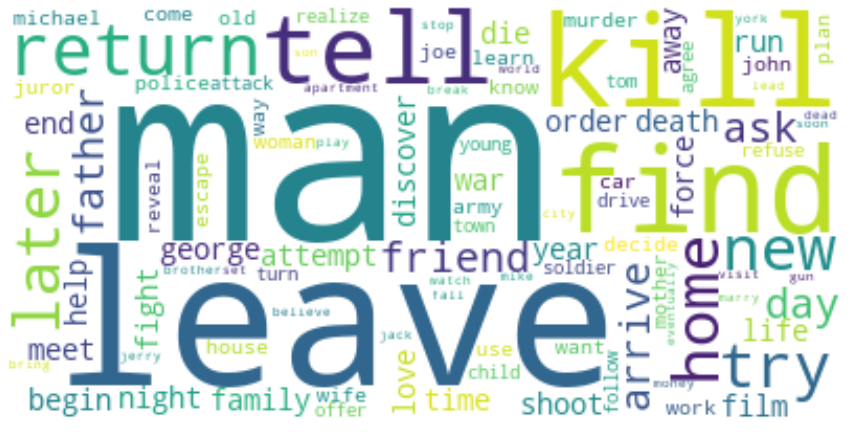

In [ ]:
#visualize the data
from wordcloud import WordCloud
import matplotlib.pyplot as plt

series = pd.Series(np.concatenate(movie_plot)).value_counts()[:100]
wordcloud = WordCloud(background_color='white').generate_from_frequencies(series)

plt.figure(figsize=(15,15), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Building Word Dictionary** \
After that we will build the vocabulary of the corpus in which all the unique words are given IDs and their frequency counds are also stored. \
we will use gensim library for building the dictionary. In gensim, the words are referred as "tokens" adn the index of each word in the dictionary is called ID.

In [ ]:
#create your dictionary
from gensim import corpora

#creating term dictionary
%time dictionary = corpora.Dictionary(movie_plot)

#filter out terms which occurs in less than 4 documents and more than 20% of the documents.
#NOTE: Since we have smaller dataset, we will keep this commented for now.

#dictionary.filter_extremes(no_below=4, no_above=0.2)

#list of few which which can be further removed
stoplist = set('hello and if this can would should could tell ask stop come go')
stop_ids = [dictionary.token2id[stopword] for stopword in stoplist if stopword in dictionary.token2id]
dictionary.filter_tokens(stop_ids)

In [ ]:
#print top 50 items from the dictionary with their unique token-id
dict_tokens = [[[dictionary[key], dictionary.token2id[dictionary[key]]] for key, value in dictionary.items() if key <= 50]]
print (dict_tokens)

[[['abrasive', 0], ['abroad', 1], ['abuse', 2], ['accept', 3], ['accuse', 4], ['act', 5], ['adams', 6], ['add', 7], ['address', 8], ['agree', 9], ['ambush', 10], ['angeles', 11], ['answer', 12], ['anthony', 13], ['apollonia', 14], ['arrange', 15], ['ask', 16], ['assassin', 17], ['assassination', 18], ['associate', 19], ['attack', 20], ['attempt', 21], ['authority', 22], ['aware', 23], ['baron', 24], ['barzini', 25], ['battle', 26], ['bed', 27], ['betrayal', 28], ['bodyguard', 29], ['bomb', 30], ['booth', 31], ['brasi', 32], ['brasis', 33], ['break', 34], ['bronx', 35], ['brother', 36], ['business', 37], ['buy', 38], ['capos', 39], ['captain', 40], ['car', 41], ['career', 42], ['carlo', 43], ['casino', 44], ['christening', 45], ['christmas', 46], ['clampdown', 47], ['clemenza', 48], ['collapse', 49], ['come', 50]]]


**Feature Extraction (Bag of Words)** \
A bag of words model, or BoW for short is a way of extracting features from text for use in modelling, such as with machine learning algorithms. It is a representation of tet that describes teh occurence of words within a document. It involves two things

1. A vocabulary of known words.
2. A measure of the presence of known words. \
The doc2bow method of dictionary, iterates through all the words in the text, if the word already exists in the corpus, it increments the frequency count, other wise it inserts the word into the corpus and sets it freqeuncy count to 1

In [ ]:
corpus = [dictionary.doc2bow(desc) for desc in movie_plot]

word_frequencies = [[(dictionary[id], frequency) for id, frequency in line] for line in corpus[0:3]]

print(word_frequencies)

[[('abrasive', 2), ('abroad', 2), ('abuse', 4), ('accept', 6), ('accuse', 2), ('act', 2), ('adams', 3), ('add', 2), ('address', 2), ('agree', 2), ('ambush', 2), ('angeles', 2), ('answer', 2), ('anthony', 3), ('apollonia', 2), ('arrange', 2), ('ask', 2), ('assassin', 4), ('assassination', 4), ('associate', 2), ('attack', 4), ('attempt', 4), ('authority', 2), ('aware', 2), ('baron', 2), ('barzini', 7), ('battle', 2), ('bed', 2), ('betrayal', 2), ('bodyguard', 2), ('bomb', 2), ('booth', 2), ('brasi', 3), ('brasis', 2), ('break', 2), ('bronx', 2), ('brother', 6), ('business', 6), ('buy', 2), ('capos', 3), ('captain', 2), ('car', 2), ('career', 2), ('carlo', 7), ('casino', 2), ('christening', 4), ('christmas', 2), ('clampdown', 2), ('clemenza', 3), ('collapse', 2), ('come', 4), ('command', 2), ('confess', 2), ('confront', 2), ('connection', 2), ('connie', 4), ('connies', 2), ('consigliere', 5), ('contact', 2), ('corleone', 10), ('corleones', 4), ('corps', 3), ('covet', 2), ('crime', 2), ('d

**Build Tf-Idf and LSI Model** \
Tf-Idf means, Term frequency-Inverse Document Frequency. it is a commonly used NLP model that helps you determine the most important words in each document in the corpus. Once the Tf-Idf is build, pass it to LSI model and specify the num of features to build

In [ ]:
%time movie_tfidf_model = gensim.models.TfidfModel(corpus, id2word=dictionary)
%time movie_lsi_model = gensim.models.LsiModel(movie_tfidf_model[corpus], id2word=dictionary, num_topics=300)

**Serialize and Store the corpus locally for easy retrival whenver required.**

In [ ]:
%time gensim.corpora.MmCorpus.serialize('movie_tfidf_model_mm', movie_tfidf_model[corpus])
%time gensim.corpora.MmCorpus.serialize('movie_lsi_model_mm',movie_lsi_model[movie_tfidf_model[corpus]])

CPU times: user 189 ms, sys: 3 ms, total: 192 ms
Wall time: 197 ms
CPU times: user 154 ms, sys: 2.01 ms, total: 156 ms
Wall time: 157 ms


In [ ]:
#Load the indexed corpus
movie_tfidf_corpus = gensim.corpora.MmCorpus('movie_tfidf_model_mm')
movie_lsi_corpus = gensim.corpora.MmCorpus('movie_lsi_model_mm')

print(movie_tfidf_corpus)
print(movie_lsi_corpus)

MmCorpus(100 documents, 8436 features, 25961 non-zero entries)
MmCorpus(100 documents, 100 features, 10000 non-zero entries)


In [ ]:
from gensim.similarities import MatrixSimilarity

%time movie_index = MatrixSimilarity(movie_lsi_corpus, num_features = movie_lsi_corpus.num_terms)

CPU times: user 18.3 ms, sys: 3 µs, total: 18.3 ms
Wall time: 18.6 ms


** Semantic Search** \
Now comes the fun part. With the index of movies initialized and loaded, we can use it to find similar movies based

We will input a search query and model will return relevant movie titles with "Relevance %" which is the similarity score. The higher the similarity score, the more similar the query to the documetn at the given index

In [ ]:
from operator import itemgetter

def search_similar_movies(search_term):

    query_bow = dictionary.doc2bow(spacy_tokenizer(search_term))
    query_tfidf = movie_tfidf_model[query_bow]
    query_lsi = movie_lsi_model[query_tfidf]

    movie_index.num_best = 5

    movies_list = movie_index[query_lsi]

    movies_list.sort(key=itemgetter(1), reverse=True)
    movie_names = []

    for j, movie in enumerate(movies_list):

        movie_names.append (
            {
                'Relevance': round((movie[1] * 100),2),
                'Movie Title': df_movies['title'][movie[0]],
                'Movie Plot': df_movies['wiki_plot'][movie[0]]
            }

        )
        if j == (movie_index.num_best-1):
            break

    return pd.DataFrame(movie_names, columns=['Relevance','Movie Title','Movie Plot'])

In [ ]:
# search for movie tiles that are related to below search parameters
search_similar_movies('crime and drugs ')

,Relevance,Movie Title,Movie Plot
0,81.47,Goodfellas,"Henry Hill (Liotta) admits, ""As far back as I ..."
1,35.15,The French Connection,"In Marseille, an undercover detective is follo..."
2,32.07,The Godfather,"On the day of his only daughter's wedding, Vit..."
3,28.77,A Clockwork Orange,"In futuristic London, Alex DeLarge is the lead..."
4,13.12,On the Waterfront,Mob-connected union boss Johnny Friendly (Lee ...


In [ ]:
# search for movie tiles that are related to below search parameters
search_similar_movies('tik tak ')

,Relevance,Movie Title,Movie Plot


In [ ]:
# search for movie tiles that are related to below search parameters
search_similar_movies('life and love')

,Relevance,Movie Title,Movie Plot
0,36.23,Gandhi,The screenplay of Gandhi is available as a pub...
1,34.45,Goodfellas,"Henry Hill (Liotta) admits, ""As far back as I ..."
2,34.16,Annie Hall,The comedian Alvy Singer (Woody Allen) is tryi...
3,31.58,Good Will Hunting,Twenty-year-old Will Hunting (Damon) of South ...
4,31.58,It Happened One Night,"Spoiled heiress Ellen ""Ellie"" Andrews has elop..."


In [ ]:
# search for movie tiles that are related to below search parameters
search_similar_movies('violence protest march')

,Relevance,Movie Title,Movie Plot
0,74.11,Gandhi,The screenplay of Gandhi is available as a pub...
1,52.19,A Clockwork Orange,"In futuristic London, Alex DeLarge is the lead..."
2,26.90,Amadeus,The story begins in 1823 as the elderly Antoni...
3,24.59,All Quiet on the Western Front,\n\n\n\n\nThis section's plot summary may be t...
4,18.33,The Best Years of Our Lives,"After World War II, Fred Derry (Dana Andrews),..."


We can use BM25 or any other tool for Relevance Ranking in
Information Retrieval
Paper link : https://arxiv.org/pdf/1710.05649.pdf

# Part 3 Bonus: How to highlight the relevant sentence in the search results

What TextRank does is very simple: it finds how similar each sentence is to all other sentences in the text. The most important sentence is the one that is most similar to all the others, with this in mind the similarity function should be oriented to the semantic of the sentence, cosine similarity based on a bag of words approach can work well and BM25/BM25+ work really nicely for TextRank

**We will try to extract top sentences from the piece of text using TextRank Algorithm**

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import re

import numpy as np
from nltk import sent_tokenize, word_tokenize

from nltk.cluster.util import cosine_distance

MULTIPLE_WHITESPACE_PATTERN = re.compile(r"\s+", re.UNICODE)


def normalize_whitespace(text):
    """
    Translates multiple whitespace into single space character.
    If there is at least one new line character chunk is replaced
    by single LF (Unix new line) character.
    """
    return MULTIPLE_WHITESPACE_PATTERN.sub(_replace_whitespace, text)


def _replace_whitespace(match):
    text = match.group()

    if "\n" in text or "\r" in text:
        return "\n"
    else:
        return " "


def is_blank(string):
    """
    Returns `True` if string contains only white-space characters
    or is empty. Otherwise `False` is returned.
    """
    return not string or string.isspace()


def get_symmetric_matrix(matrix):
    """
    Get Symmetric matrix
    :param matrix:
    :return: matrix
    """
    return matrix + matrix.T - np.diag(matrix.diagonal())


def core_cosine_similarity(vector1, vector2):
    """
    measure cosine similarity between two vectors
    :param vector1:
    :param vector2:
    :return: 0 < cosine similarity value < 1
    """
    return 1 - cosine_distance(vector1, vector2)


'''
Note: This is not a summarization algorithm. This Algorithm pics top sentences irrespective of the order they appeared.
'''


class TextRank4Sentences():
    def __init__(self):
        self.damping = 0.85  # damping coefficient, usually is .85
        self.min_diff = 1e-5  # convergence threshold
        self.steps = 100  # iteration steps
        self.text_str = None
        self.sentences = None
        self.pr_vector = None

    def _sentence_similarity(self, sent1, sent2, stopwords=None):
        if stopwords is None:
            stopwords = []

        sent1 = [w.lower() for w in sent1]
        sent2 = [w.lower() for w in sent2]

        all_words = list(set(sent1 + sent2))

        vector1 = [0] * len(all_words)
        vector2 = [0] * len(all_words)

        # build the vector for the first sentence
        for w in sent1:
            if w in stopwords:
                continue
            vector1[all_words.index(w)] += 1

        # build the vector for the second sentence
        for w in sent2:
            if w in stopwords:
                continue
            vector2[all_words.index(w)] += 1

        return core_cosine_similarity(vector1, vector2)

    def _build_similarity_matrix(self, sentences, stopwords=None):
        # create an empty similarity matrix
        sm = np.zeros([len(sentences), len(sentences)])

        for idx1 in range(len(sentences)):
            for idx2 in range(len(sentences)):
                if idx1 == idx2:
                    continue

                sm[idx1][idx2] = self._sentence_similarity(sentences[idx1], sentences[idx2], stopwords=stopwords)

        # Get Symmeric matrix
        sm = get_symmetric_matrix(sm)

        # Normalize matrix by column
        norm = np.sum(sm, axis=0)
        sm_norm = np.divide(sm, norm, where=norm != 0)  # this is ignore the 0 element in norm

        return sm_norm

    def _run_page_rank(self, similarity_matrix):

        pr_vector = np.array([1] * len(similarity_matrix))

        # Iteration
        previous_pr = 0
        for epoch in range(self.steps):
            pr_vector = (1 - self.damping) + self.damping * np.matmul(similarity_matrix, pr_vector)
            if abs(previous_pr - sum(pr_vector)) < self.min_diff:
                break
            else:
                previous_pr = sum(pr_vector)

        return pr_vector

    def _get_sentence(self, index):

        try:
            return self.sentences[index]
        except IndexError:
            return ""

    def get_top_sentences(self, number=5):

        top_sentences = []

        if self.pr_vector is not None:

            sorted_pr = np.argsort(self.pr_vector)
            sorted_pr = list(sorted_pr)
            sorted_pr.reverse()

            index = 0
            for epoch in range(number):
                sent = self.sentences[sorted_pr[index]]
                sent = normalize_whitespace(sent)
                top_sentences.append(sent)
                index += 1

        return top_sentences

    def analyze(self, text, stop_words=None):
        self.text_str = text
        self.sentences = sent_tokenize(self.text_str)

        tokenized_sentences = [word_tokenize(sent) for sent in self.sentences]

        similarity_matrix = self._build_similarity_matrix(tokenized_sentences, stop_words)

        self.pr_vector = self._run_page_rank(similarity_matrix)


text_str = '''
    Those Who Are Resilient Stay In The Game Longer *
    “On the mountains of truth you can never climb in vain: either you will reach a point higher up today, or you will be training your powers so that you will be able to climb higher tomorrow.” — Friedrich Nietzsche
    Challenges and setbacks are not meant to defeat you, but promote you. However, I realise after many years of defeats, it can crush your spirit and it is easier to give up than risk further setbacks and disappointments. Have you experienced this before? To be honest, I don’t have the answers. I can’t tell you what the right course of action is; only you will know. However, it’s important not to be discouraged by failure when pursuing a goal or a dream, since failure itself means different things to different people. To a person with a Fixed Mindset failure is a blow to their self-esteem, yet to a person with a Growth Mindset, it’s an opportunity to improve and find new ways to overcome their obstacles. Same failure, yet different responses. Who is right and who is wrong? Neither. Each person has a different mindset that decides their outcome. Those who are resilient stay in the game longer and draw on their inner means to succeed.
    '''

tr4sh = TextRank4Sentences()
tr4sh.analyze(text_str)
print(tr4sh.get_top_sentences(5))

['\nThose Who Are Resilient Stay In The Game Longer *\n“On the mountains of truth you can never climb in vain: either you will reach a point higher up today, or you will be training your powers so that you will be able to climb higher tomorrow.” — Friedrich Nietzsche\nChallenges and setbacks are not meant to defeat you, but promote you.', 'To be honest, I don’t have the answers.', 'To a person with a Fixed Mindset failure is a blow to their self-esteem, yet to a person with a Growth Mindset, it’s an opportunity to improve and find new ways to overcome their obstacles.', 'However, it’s important not to be discouraged by failure when pursuing a goal or a dream, since failure itself means different things to different people.', 'However, I realise after many years of defeats, it can crush your spirit and it is easier to give up than risk further setbacks and disappointments.']


**Same work but with keywords**

In [ ]:
from collections import OrderedDict
import numpy as np
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load('en_core_web_sm')

class TextRank4Keyword():
    """Extract keywords from text"""
    
    def __init__(self):
        self.d = 0.85 # damping coefficient, usually is .85
        self.min_diff = 1e-5 # convergence threshold
        self.steps = 10 # iteration steps
        self.node_weight = None # save keywords and its weight

    
    def set_stopwords(self, stopwords):  
        """Set stop words"""
        for word in STOP_WORDS.union(set(stopwords)):
            lexeme = nlp.vocab[word]
            lexeme.is_stop = True
    
    def sentence_segment(self, doc, candidate_pos, lower):
        """Store those words only in cadidate_pos"""
        sentences = []
        for sent in doc.sents:
            selected_words = []
            for token in sent:
                # Store words only with cadidate POS tag
                if token.pos_ in candidate_pos and token.is_stop is False:
                    if lower is True:
                        selected_words.append(token.text.lower())
                    else:
                        selected_words.append(token.text)
            sentences.append(selected_words)
        return sentences
        
    def get_vocab(self, sentences):
        """Get all tokens"""
        vocab = OrderedDict()
        i = 0
        for sentence in sentences:
            for word in sentence:
                if word not in vocab:
                    vocab[word] = i
                    i += 1
        return vocab
    
    def get_token_pairs(self, window_size, sentences):
        """Build token_pairs from windows in sentences"""
        token_pairs = list()
        for sentence in sentences:
            for i, word in enumerate(sentence):
                for j in range(i+1, i+window_size):
                    if j >= len(sentence):
                        break
                    pair = (word, sentence[j])
                    if pair not in token_pairs:
                        token_pairs.append(pair)
        return token_pairs
        
    def symmetrize(self, a):
        return a + a.T - np.diag(a.diagonal())
    
    def get_matrix(self, vocab, token_pairs):
        """Get normalized matrix"""
        # Build matrix
        vocab_size = len(vocab)
        g = np.zeros((vocab_size, vocab_size), dtype='float')
        for word1, word2 in token_pairs:
            i, j = vocab[word1], vocab[word2]
            g[i][j] = 1
            
        # Get Symmeric matrix
        g = self.symmetrize(g)
        
        # Normalize matrix by column
        norm = np.sum(g, axis=0)
        g_norm = np.divide(g, norm, where=norm!=0) # this is ignore the 0 element in norm
        
        return g_norm

    
    def get_keywords(self, number=10):
        """Print top number keywords"""
        node_weight = OrderedDict(sorted(self.node_weight.items(), key=lambda t: t[1], reverse=True))
        for i, (key, value) in enumerate(node_weight.items()):
            print(key + ' - ' + str(value))
            if i > number:
                break
        
        
    def analyze(self, text, 
                candidate_pos=['NOUN', 'PROPN'], 
                window_size=4, lower=False, stopwords=list()):
        """Main function to analyze text"""
        
        # Set stop words
        self.set_stopwords(stopwords)
        
        # Pare text by spaCy
        doc = nlp(text)
        
        # Filter sentences
        sentences = self.sentence_segment(doc, candidate_pos, lower) # list of list of words
        
        # Build vocabulary
        vocab = self.get_vocab(sentences)
        
        # Get token_pairs from windows
        token_pairs = self.get_token_pairs(window_size, sentences)
        
        # Get normalized matrix
        g = self.get_matrix(vocab, token_pairs)
        
        # Initionlization for weight(pagerank value)
        pr = np.array([1] * len(vocab))
        
        # Iteration
        previous_pr = 0
        for epoch in range(self.steps):
            pr = (1-self.d) + self.d * np.dot(g, pr)
            if abs(previous_pr - sum(pr))  < self.min_diff:
                break
            else:
                previous_pr = sum(pr)

        # Get weight for each node
        node_weight = dict()
        for word, index in vocab.items():
            node_weight[word] = pr[index]
        
        self.node_weight = node_weight

In [ ]:
text = 'The Wandering Earth, described as China’s first big-budget science fiction thriller, quietly made it onto screens at AMC theaters in North America this weekend, and it shows a new side of Chinese filmmaking — one focused toward futuristic spectacles rather than China’s traditionally grand, massive historical epics. At the same time, The Wandering Earth feels like a throwback to a few familiar eras of American filmmaking. While the film’s cast, setting, and tone are all Chinese, longtime science fiction fans are going to see a lot on the screen that reminds them of other movies, for better or worse.'


tr4w = TextRank4Keyword()
tr4w.analyze(text, candidate_pos = ['NOUN', 'PROPN'], window_size=4, lower=False)
tr4w.get_keywords(10)

science - 1.7276378287292111
fiction - 1.7123791481736559
filmmaking - 1.4388798751402918
China - 1.4172218029410266
Earth - 1.3088154732297723
Chinese - 1.0971675275482093
fans - 1.0971675275482093
Wandering - 1.0071059904601571
weekend - 1.002449354657688
America - 0.9976329264870932
budget - 0.9769693829073562
North - 0.9711240881032547
